# Read me

This script reproduces Figure 4 in [1].

> [1] Rubbens, Anne, Hendrickx, Julien M., and Taylor, Adrien B. "A constructive approach to strengthen algebraic descriptions of function and operator classes."

Given $(x_1,t_1)=([0,0]',[0 ,0]')$, $(x_2,t_2)=([1,0]',[0, -1/2]')$ $ x_3=[1/2 ,1/2]'$, and $L=1$, it plots the allowed region for $t_3^{(2)}$ as a function of $t_3^{(1)}$, according to 
  
$q_{0,L}$, satisfied at ${(x_i,t_i),(x_j,t_j)}$ if and only if:
      
>$A_{ij}=\|t_i-t_j\|^2-L^2\|x_i-x_j\|^2$, and $B_{ij}=-2L\langle t_i-t_j,x_i-x_j\rangle$.

and to $\tilde{q}_{0,L}$, satisfied at ${(x_i,t_i),(x_j,t_j),(x_k,t_k)}$ if and only if,  $\forall \lambda_k, \mu_i, \mu_j\geq 0$:
> $0\geq \lambda_k(\mu_i+\mu_j)(A_{ik}\mu_i+A_{jk}\mu_j)-\lambda_k \mu_i\mu_j A_{ij}+\lambda_k^2 (B_{ik} \mu_i+B_{jk}\mu_j)+B_{ij} \mu_i\mu_j(\mu_i+\mu_j)$ and $ 0\geq \lambda_k(\mu_i+\mu_j)(B_{ik}\mu_i+B_{jk}\mu_j)-\lambda_k \mu_i\mu_j B_{ij}+\lambda_k^2 (A_{ik} \mu_i+A_{jk}\mu_j)+A_{ij} \mu_i\mu_j(\mu_i+\mu_j)$.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Computation of the extremal value for $t_3^{(2)}$ such that ${(x_1, t_1),(x_2, t_2),(x_3,t_3)}$ satisfies $q_{0,L}$ or $\tilde{q}_{0,L}$

Arguments:

>$x_1,t_1,x_2,t_2,x_3,t_{31}$: values of the dataset to be consistent with $q_{0,L}$ or $\tilde{q}_{0,L}$

>$L$: parameter of $q_{0,L}$ or $\tilde{q}_{0,L}$

>objective: If objective>=0, extremal_val_monotone_Lipschitz computes the minimal value for $t_3^{(2)}$. Else, it computes its maximal value.
>
>constr: If constr >= 0, it ensures the set satisfies $q_{0,L}$. Otherwise, it ensures the set satisfies $\tilde{q}_{0,L}$.


In [41]:
# For the sake of clarity, t3=[t31, t32]
def extremal_val_monotone_Lipschitz(x1,t1,x2,t2,x3,t31,L,constr,objective):
    options = {'disp': False}
    # Ensuring that {((x1, t1), (x2, t2),(x3,t3)} satisfies q_{mu,beta} or tilde{q}_{mu,beta}.
    cons = [{'type': 'ineq', 'fun': lambda t32: -((t1[0]-t31)**2+(t1[1]-t32)**2)+L**2 * np.linalg.norm(x2 - x3)**2},
    {'type': 'ineq', 'fun': lambda t32: -((t2[0]-t31)**2+(t2[1]-t32)**2)+L**2 * np.linalg.norm(x1 - x3)**2},
    {'type': 'ineq', 'fun': lambda t32: (t31-t1[0])*(x3[0]-x1[0])+(t32-t1[1])*(x3[1]-x1[1])},
    {'type': 'ineq', 'fun': lambda t32: (t31-t2[0])*(x3[0]-x2[0])+(t32-t2[1])*(x3[1]-x2[1])}]
    if constr<=0 and (np.dot(t2 - t1, x2 - x1)==0):
        cons.append({'type': 'ineq', 'fun': lambda t32: -((np.linalg.norm(t1 - t2)**2- L**2 * np.linalg.norm(x1 - x2)**2)**2 
                                                          + ((t1[0]-t31)**2+(t1[1]-t32)**2-L**2 * np.linalg.norm(x2 - x3)**2 
                                                             - ((t2[0]-t31)**2+(t2[1]-t32)**2-L**2 * np.linalg.norm(x1 - x3)**2))**2 
                                                          - 2 * ((t1[0]-t31)**2+(t1[1]-t32)**2-L**2 * np.linalg.norm(x2 - x3)**2 
                                                                +(t2[0]-t31)**2+(t2[1]-t32)**2-L**2 * np.linalg.norm(x1 - x3)**2) 
                                                            * (np.linalg.norm(t1 - t2)**2- L**2 * np.linalg.norm(x1 - x2)**2))})
    
    # Initial value for t32
    t32_0 = 1
    # Minimization or maximization of t32
    def fun_obj(t32):
        return t32*objective

    res = minimize(fun_obj, t32_0, constraints=cons, options={'disp': False})
    
    return res.x[0]   


In [60]:
# Dataset and parameters
x1 = np.array([0, 0])
x2 = np.array([1, 0])
x3 = np.array([1/2, 1/2])
t1 = np.array([0, 0])
t2 = np.array([0, -1/2])
L = 1


# Interval of values for h3
N = 100
T31_1 = np.linspace(-0.183,0.5,N)
T31_2 = np.linspace(-0.16,0.445,N)
                   
# Initialize arrays for t32_min and t32_max
t32_min = np.zeros((2, N))
t32_max = np.zeros((2, N))

# Compute the extremal values for t32 as a function of t31
for i in range(N):
    t32_min[0, i] = extremal_val_monotone_Lipschitz(x1,t1,x2,t2,x3,T31_1[i],L,1,1)
    t32_max[0, i] = extremal_val_monotone_Lipschitz(x1,t1,x2,t2,x3,T31_1[i],L,1,-1)
    t32_min[1, i] = extremal_val_monotone_Lipschitz(x1,t1,x2,t2,x3,T31_2[i],L,-1,1)
    t32_max[1, i] = extremal_val_monotone_Lipschitz(x1,t1,x2,t2,x3,T31_2[i],L,-1,-1)

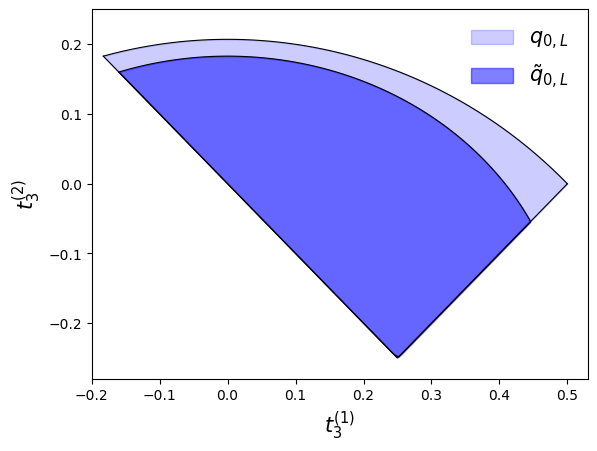

In [61]:
# Plot the result
plt.fill_between(T31_1, t32_min[0, :], t32_max[0, :], color='blue', alpha=0.2, label=r'$q_{0,L}$')
plt.fill_between(T31_2, t32_min[1, :], t32_max[1, :], color='blue', alpha=0.5, label=r'$\tilde{q}_{0,L}$')
plt.plot(T31_1, t32_min[0,:], color='black', linewidth=0.8)
plt.plot(T31_1, t32_max[0,:], color='black', linewidth=0.8)
plt.plot(T31_2, t32_min[1,:], color='black', linewidth=0.8) 
plt.plot(T31_2, t32_max[1,:], color='black', linewidth=0.8)
# Adding labels and formatting
plt.xlabel(r'$t_3^{(1)}$', fontsize=15)
plt.ylabel(r'$t_3^{(2)}$', fontsize=15)
plt.xlim([-0.2,0.53])
plt.ylim([-0.28,0.25])
plt.legend(fontsize=15, loc='upper right', frameon=False)
plt.show()